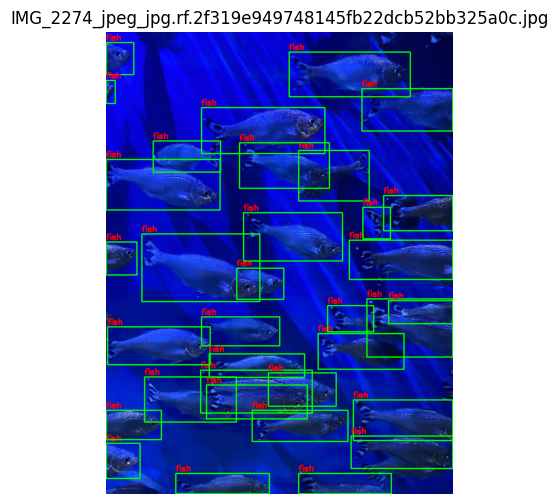

In [3]:
import cv2
import matplotlib.pyplot as plt
import yaml

image_path = "aquarium_dataset/train/images"
label_path = "aquarium_dataset/train/labels"

with open("aquarium_dataset/data.yaml", 'r') as stream:
    data = yaml.safe_load(stream)
class_names = data['names']

def draw_yolo_bbox(image_file):
    img = cv2.imread(os.path.join(image_path, image_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_file_path = os.path.join(label_path, label_file)

    if os.path.exists(label_file_path):
        with open(label_file_path, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, bw, bh = map(float, line.strip().split())
                x1 = int((x_center - bw / 2) * w)
                y1 = int((y_center - bh / 2) * h)
                x2 = int((x_center + bw / 2) * w)
                y2 = int((y_center + bh / 2) * h)
                label = class_names[int(class_id)]

                cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
                cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
    plt.show()

sample_img = os.listdir(image_path)[0]
draw_yolo_bbox(sample_img)


In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

D:\Internships\intern intelligence\jupyter notebook\yolov5


Cloning into 'yolov5'...


  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.4 MB ? eta -:--:--
    --------------------------------------- 0.5/38.4 MB 1.2 MB/s eta 0:00:32
    --------------------------------------- 0.8/38.4 MB 1.2 MB/s eta 0:00:32
   - -------------------------------------- 1.0/38.4 MB 1.2 MB/s eta 0:00:32
   - -------------------------------------- 1.6/38.4 MB 1.2 MB/s eta 0:00:31
   -- ------------------------------------- 2.1/38.4 MB 1.4 MB/s eta 0:00:26
   -- ------------------------------------- 2.4/38.4 MB 1.4 MB/s eta 0:00:25
   --- ------------------------------------ 2.9/38.4 MB 1.6 MB/s eta 0:00:23
   --- ------------------------------------ 3.4/38.4 MB 1.6 MB/s eta 0:00:22
   ---- ----------------------------------- 3.9/38.4 MB 1.7 MB/s eta 0:00:21
   ---- ---------------------------

In [ ]:
!python train.py --img 640 --batch 8 --epochs 20 --data ../aquarium_dataset/data.yaml --weights yolov5s.pt --name aquarium_model

In [2]:
# Go to yolov5 folder
%cd yolov5

# Run inference using best.pt
!python detect.py --weights runs/train/aquarium_model2/weights/best.pt --img 640 --conf 0.25 --source ../aquarium_dataset/valid/images


D:\Internships\intern intelligence\jupyter notebook\yolov5


detect: weights=['runs/train/aquarium_model2/weights/best.pt'], source=../aquarium_dataset/valid/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'D:\Internships\intern': No such file or directory
YOLOv5  2025-7-14 Python-3.12.6 torch-2.7.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/127 D:\Internships\intern intelligence\jupyter notebook\aquarium_dataset\valid\images\IMG_2277_jpeg_jpg.rf.86c72d6192da48d941ffa957f4780665.jpg: 640x480 12 fishs, 2 sharks, 562.0ms
image 2/127 D:\Internships\intern intelligence\jupyter noteboo

In [3]:
!python val.py --weights runs/train/aquarium_model2/weights/best.pt --data ../aquarium_dataset/data.yaml --img 640

val: data=../aquarium_dataset/data.yaml, weights=['runs/train/aquarium_model2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'D:\Internships\intern': No such file or directory
YOLOv5  2025-7-14 Python-3.12.6 torch-2.7.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning D:\Internships\intern intelligence\jupyter notebook\aquarium_dataset\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|##########| 127/127 [00:00<?, ?it/s]
val: Scanning D:\Internships\intern intelligence\jupyter notebook\aquarium_dataset\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|##########| 127/127 [00:00<?, ?it/s]

                 Class     I